<a href="https://colab.research.google.com/github/MagnusRedkin/Netology/blob/main/%D0%94%D0%97%C2%AB%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%2C_%D0%BF%D0%B5%D1%80%D0%B5%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5%2C_%D1%80%D0%B5%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание:
Решить задачу классификации при помощи обучения модели логистической регрессии. Качество модели оценивается путем подсчета метрик TPR, FPR и построения графиков ROC-кривой, Precision-Recall. Данные для обучения модели хранятся в файле athletes.csv, который можно найти в материалах к занятию.
## Этапы работы:
1. Преобразуйте данные:
    * проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;
    * закодируйте категориальные переменные числовыми значениями по необходимости.
2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.
3. Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.
4. Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.
5. Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.
6. Постройте ROC-кривую с помощью вычисленных в п. 5 метрик: объедините графики из п. 3 и п. 6 в один. Сравните, сделайте вывод.
7. Постройте график Precision-Recall, используя метрики, посчитанные в п. 5.
8. *Вычислите значение ROC-AUC метрики, используя метрики, посчитанные в п. 5.
9. **Сформулируйте выводы по проделанной работе:**
    * как по полученным графикам сделать вывод о качестве модели? Как вы оцениваете обученную модель исходя из подсчитанных метрик?
    * может ли ROC-кривая проходить ниже диагонали?

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/MagnusRedkin/Netology/main/athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [ ]:
data.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

**Удаляем пропуски.**

In [ ]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

**Кодируем категориальные переменные числовыми значениями, удаляем ненужные**

In [ ]:
X = pd.get_dummies(data, columns=['nationality', 'sport'], drop_first=True)
X.drop(columns = ['sex', 'id', 'name', 'dob'],axis = 1, inplace=True)
X.head()

,height,weight,gold,silver,bronze,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
le = LabelEncoder()
le.fit(data['sex'])

LabelEncoder()

In [ ]:
Y = pd.Series(data=le.transform(data['sex']))
Y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int32

**Обучаем модель**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [ ]:
predictions = model.predict_proba(X_test)

In [ ]:
model.score(X_train, Y_train)

0.8427354363343311

In [ ]:
model.score(X_test, Y_test)

0.8370165745856354

**Модель обучилась неплохо (на первый взгляд).
строим ROC-кривую с помощью функции sklearn.metrics.roc_curve**

In [ ]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1])

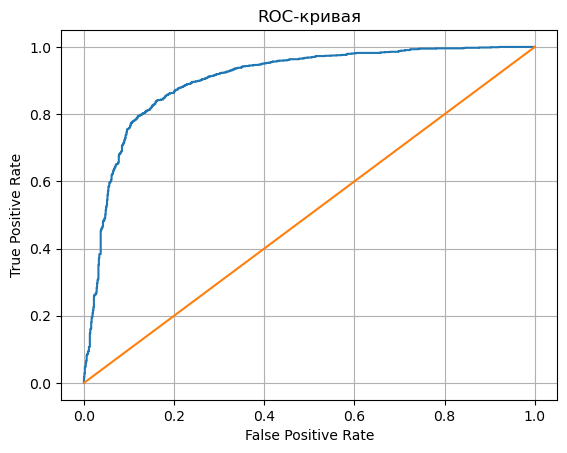

In [ ]:
plt.title('ROC-кривая')
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.grid()
plt.show()

**Вычисляем значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.**

In [ ]:
roc_auc_score(Y_test, predictions[:, 1])

0.9029562126055241

**Посмотрим, что у нас получилось.**

In [ ]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba(X_test)
for predicted_prob, actual in zip(predictions[:, 1], Y_test):
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0

    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1

    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [ ]:
tp, fp, fn, tn

(1009, 187, 167, 809)

In [ ]:
accuracy = (tp + tn) / (tp + fp + fn + tn)
accuracy

0.8370165745856354

In [ ]:
precision = tp / (tp + fp)
precision

0.8436454849498328

In [ ]:
TPR = tp / (tp + fn)
TPR

0.8579931972789115

In [ ]:
FPR = fp /(fp + tn)
FPR

0.18775100401606426

**Неплохо.
Реализуем подсчет метрик TPR, FPR «вручную»
(заодно и *precision*)**

In [ ]:
fprar = []
tprar = []
precision = []

for thresh in np.linspace(0,0.99,100):
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    for predicted_prob, actual in zip(predictions[:, 1], Y_test):
        if predicted_prob >= thresh:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1


    fp_r = fp / (fp + tn)
    tp_r = tp / (tp + fn)
    prec = tp / (tp + fp)

    fprar.append(fp_r)
    tprar.append(tp_r)
    precision.append(prec)

**Строим ROC-кривую с помощью вычисленных ранее метрик.**

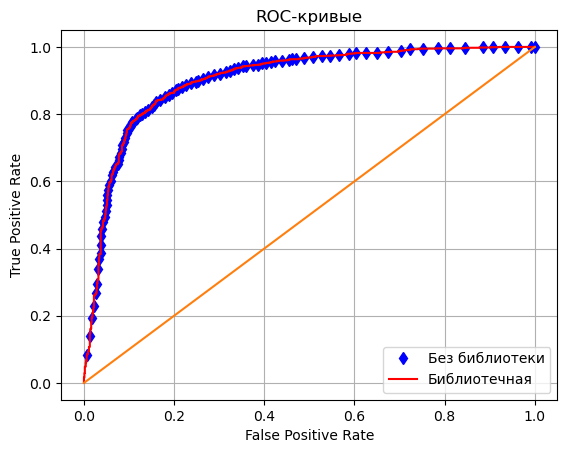

In [ ]:
plt.title('ROC-кривые')
plt.plot(fprar, tprar,  'db', label='Без библиотеки')
plt.plot(fpr, tpr, 'r', label='Библиотечная')
plt.plot([0,1], [0,1], '#ff7f0e')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.grid()
plt.show()

**Графики совпадают, у формул суть одна, вот если-бы не совпали, нужно было-бы искать причину.
Строим график Precision-Recall**

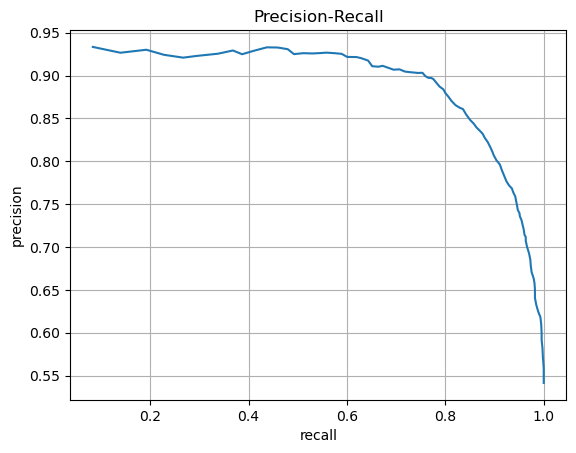

In [ ]:
plt.title('Precision-Recall')
plt.plot(tprar, precision)

plt.xlabel('recall')
plt.ylabel('precision')

plt.grid()

**Вычисляем значение ROC-AUC метрики**

In [ ]:
auc(fprar, tprar)

0.9027560070212823

**Модель, исходя из подсчитанных метрик, получилась хорошая. Если убрать виды спорта, получается хуже.
(если государства - тоже)  
Я политкорретен!**

**[может ли ROC-кривая проходить ниже диагонали?](https://ru.wikipedia.org/wiki/ROC-%D0%BA%D1%80%D0%B8%D0%B2%D0%B0%D1%8F#:~:text=%D0%9F%D1%80%D0%B8%20%D1%82%D0%B5%D1%85%20%D0%BF%D0%BE%D1%80%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D1%85%20t%2C%20%D0%B3%D0%B4%D0%B5%20ROC%2D%D0%BA%D1%80%D0%B8%D0%B2%D0%B0%D1%8F%20%D0%BD%D0%B8%D0%B6%D0%B5%20%D0%B4%D0%B8%D0%B0%D0%B3%D0%BE%D0%BD%D0%B0%D0%BB%D0%B8%201%E2%88%92Spe%20%3D%20Sen%2C%20%D0%BC%D0%BE%D0%B6%D0%BD%D0%BE%20%D0%B8%D0%BD%D0%B2%D0%B5%D1%80%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D1%82%D1%8C%20%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9%20(%D0%B2%D1%81%D1%91%2C%20%D1%87%D1%82%D0%BE%20%D0%BC%D0%B5%D0%BD%D1%8C%D1%88%D0%B5%20t%2C%20%D0%BE%D0%B1%D1%8A%D1%8F%D0%B2%D0%B8%D1%82%D1%8C%20%D0%BF%D0%BE%D0%BB%D0%BE%D0%B6%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%BC)%2C%20%D0%B8%20%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80%20%D0%B1%D1%83%D0%B4%D0%B5%D1%82%20%D0%B4%D0%B5%D0%B9%D1%81%D1%82%D0%B2%D0%BE%D0%B2%D0%B0%D1%82%D1%8C%20%D0%BB%D1%83%D1%87%D1%88%D0%B5%2C%20%D1%87%D0%B5%D0%BC%20%D0%B8%D0%B7%D0%BD%D0%B0%D1%87%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%3A%20%D0%BF%D0%BE%D0%B2%D1%8B%D1%88%D0%B0%D0%B5%D1%82%D1%81%D1%8F%20%D0%B8%20%D1%87%D1%83%D0%B2%D1%81%D1%82%D0%B2%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D1%8C%2C%20%D0%B8%20%D1%81%D0%BF%D0%B5%D1%86%D0%B8%D1%84%D0%B8%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C.)  
При тех пороговых t, где ROC-кривая ниже диагонали 1−Spe = Sen, можно инвертировать критерий (всё, что меньше t, объявить положительным), и классификатор будет действовать лучше, чем изначально: повышается и чувствительность, и специфичность.**